<a href="https://colab.research.google.com/github/davidlealo/sic_ai_2025_jun/blob/main/03machinelearning/clase_16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Ejemplo de agrupacion jerarquica

In [5]:
from sklearn.datasets import make_blobs, make_moons
import matplotlib.pyplot as plt


### Generate isotropic Gaussian blobs for clustering

https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html

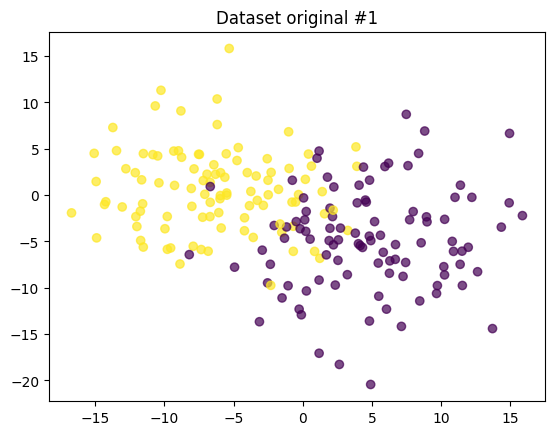

In [6]:
X1, label1 = make_blobs(n_samples=200, n_features=2, centers=2, cluster_std=5, random_state=123)
plt.scatter(X1[:,0], X1[:,1], c = label1, alpha=0.7)
plt.title('Dataset original #1')
plt.show()

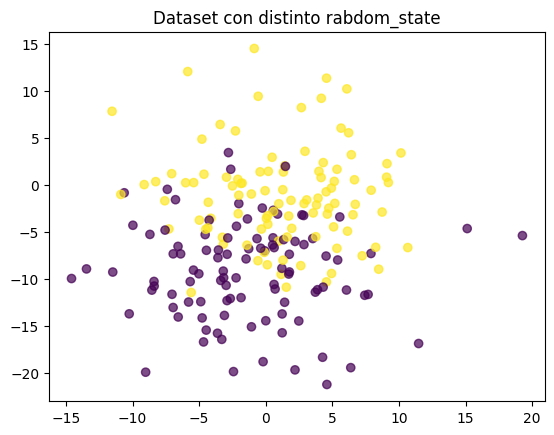

In [7]:
Xn, label1 = make_blobs(n_samples=200, n_features=2, centers=2, cluster_std=5, random_state=2)
plt.scatter(Xn[:,0], Xn[:,1], c = label1, alpha=0.7)
plt.title('Dataset con distinto rabdom_state')
plt.show()

### Make two interleaving half circles

https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html

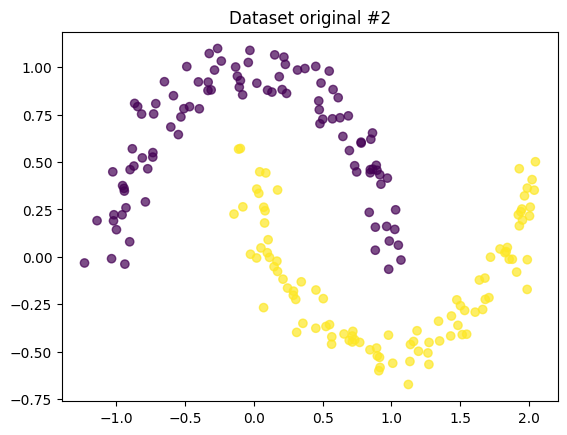

In [8]:
X2, label2 = make_moons(n_samples=200, noise=0.08, random_state=123)
plt.scatter(X2[:,0], X2[:,1], c = label2, alpha=0.7)
plt.title('Dataset original #2')
plt.show()

### Agglomerative Clustering

http://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html

In [9]:
from sklearn.cluster import AgglomerativeClustering

In [10]:
import numpy as np
import pandas as pd

In [ ]:
X1

In [12]:
# Instanciar el algoritmo

model = AgglomerativeClustering(n_clusters=2)

# Realizo el ajuste del modelo
model.fit(X1)

AgglomerativeClustering()

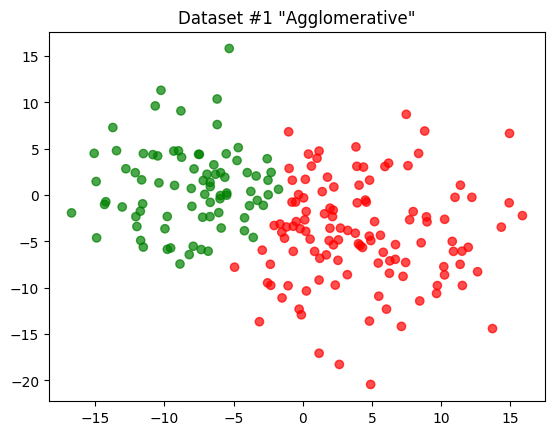

In [16]:
# Visualización del modelo

my_colors = {0: 'red', 1: 'green'}
plt.scatter(X1[:,0], X1[:,1], c = pd.Series(model.labels_).apply(lambda x: my_colors[x]), alpha=0.7)
plt.title('Dataset #1 "Agglomerative"')
plt.show()

In [18]:
# Instanciar el algoritmo

model = AgglomerativeClustering(n_clusters=2)

# Realizo el ajuste del modelo
model.fit(X2)

AgglomerativeClustering()

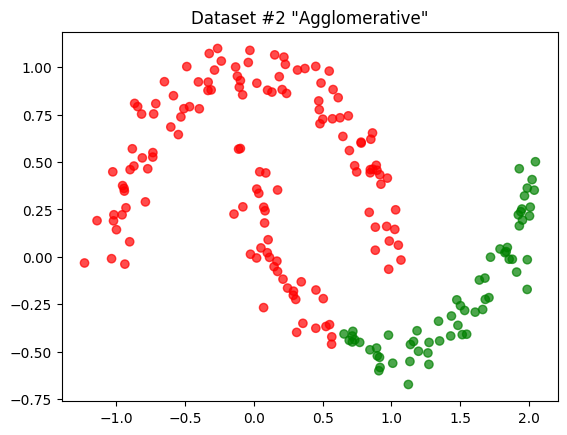

In [19]:
# Visualización del modelo

my_colors = {0: 'red', 1: 'green'}
plt.scatter(X2[:,0], X2[:,1], c = pd.Series(model.labels_).apply(lambda x: my_colors[x]), alpha=0.7)
plt.title('Dataset #2 "Agglomerative"')
plt.show()

# Ejemplos de `AgglomerativeClustering` con diferentes valores de `metric`

Este documento muestra ejemplos de uso del algoritmo `AgglomerativeClustering` de `scikit-learn`, variando el hiperparámetro `metric` en función del valor de `linkage`.

## 📦 Requisitos previos

```python
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering

# Datos sintéticos
X, _ = make_blobs(n_samples=100, centers=3, cluster_std=1.0, random_state=42)

# Función para graficar los clusters
def plot_clusters(X, labels, title):
    plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
    plt.title(title)
    plt.show()
```

---

## 🔹 linkage = `'ward'`

✅ Solo acepta `metric='euclidean'`

```python
model = AgglomerativeClustering(n_clusters=3, linkage='ward', metric='euclidean')
labels = model.fit_predict(X)
plot_clusters(X, labels, 'linkage=ward, metric=euclidean')
```

---

## 🔹 linkage = `'average'`

Admite varias métricas:

### `metric='euclidean'`

```python
model = AgglomerativeClustering(n_clusters=3, linkage='average', metric='euclidean')
labels = model.fit_predict(X)
plot_clusters(X, labels, 'linkage=average, metric=euclidean')
```

### `metric='manhattan'`

```python
model = AgglomerativeClustering(n_clusters=3, linkage='average', metric='manhattan')
labels = model.fit_predict(X)
plot_clusters(X, labels, 'linkage=average, metric=manhattan')
```

### `metric='cosine'`

```python
model = AgglomerativeClustering(n_clusters=3, linkage='average', metric='cosine')
labels = model.fit_predict(X)
plot_clusters(X, labels, 'linkage=average, metric=cosine')
```

---

## 🔹 linkage = `'complete'`

También permite varias métricas:

### `metric='chebyshev'`

```python
model = AgglomerativeClustering(n_clusters=3, linkage='complete', metric='chebyshev')
labels = model.fit_predict(X)
plot_clusters(X, labels, 'linkage=complete, metric=chebyshev')
```

---

## 🔹 linkage = `'single'`

Permite aún más métricas:

### `metric='hamming'`

```python
model = AgglomerativeClustering(n_clusters=3, linkage='single', metric='hamming')
labels = model.fit_predict(X)
plot_clusters(X, labels, 'linkage=single, metric=hamming')
```

### `metric='minkowski'`

```python
model = AgglomerativeClustering(n_clusters=3, linkage='single', metric='minkowski')
labels = model.fit_predict(X)
plot_clusters(X, labels, 'linkage=single, metric=minkowski')
```

---

## 🔧 Uso de `metric='precomputed'` con matriz de distancias

```python
from sklearn.metrics import pairwise_distances

# Matriz de distancias precomputada
D = pairwise_distances(X, metric='cosine')

model = AgglomerativeClustering(n_clusters=3, linkage='average', metric='precomputed')
labels = model.fit_predict(D)
plot_clusters(X, labels, 'linkage=average, metric=precomputed (cosine)')
```


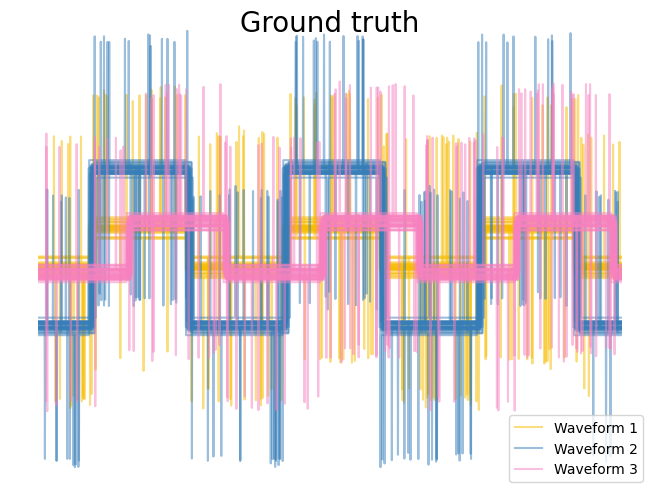

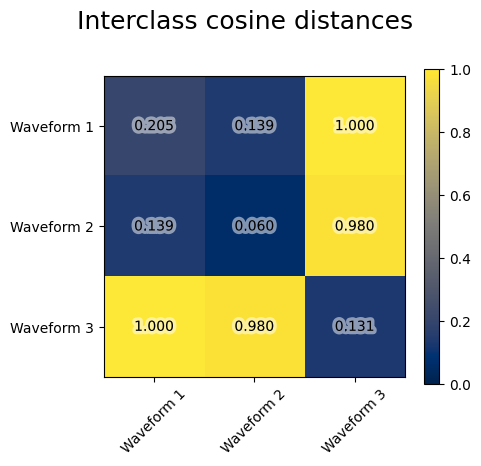

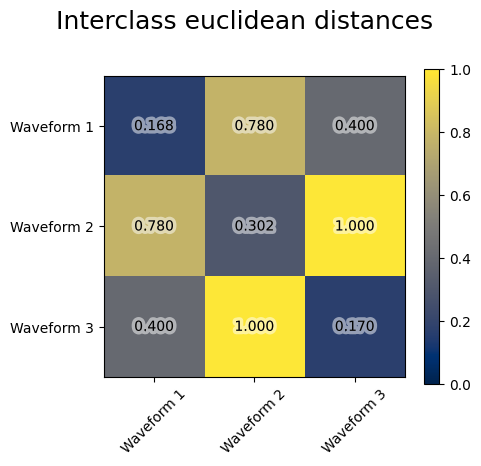

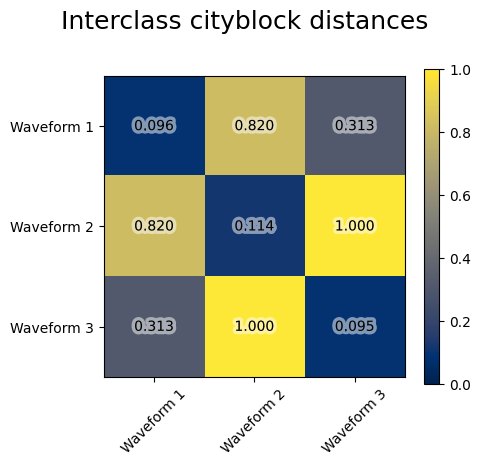

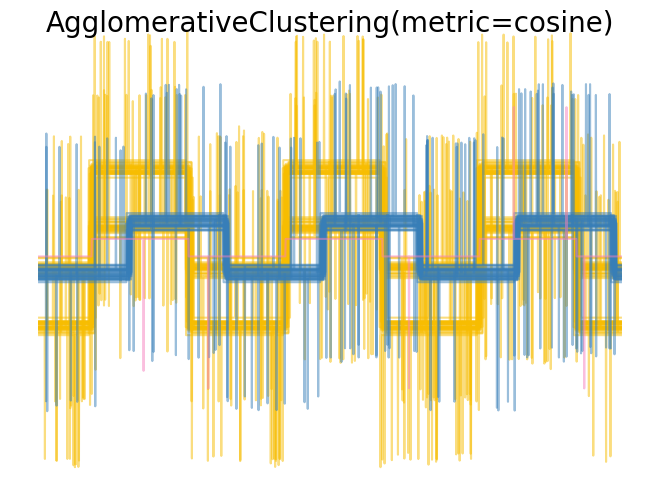

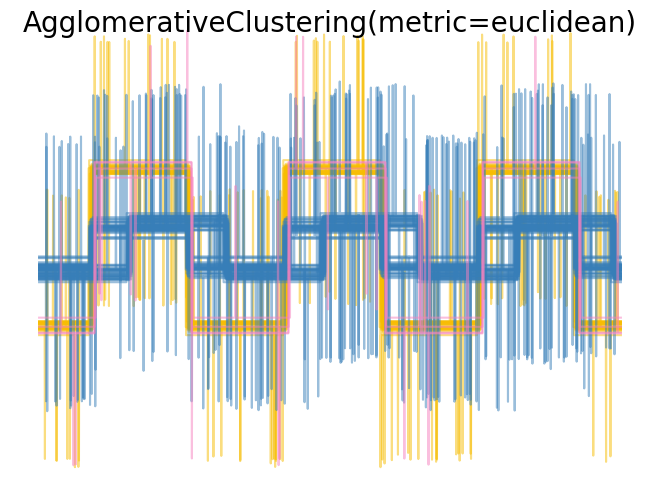

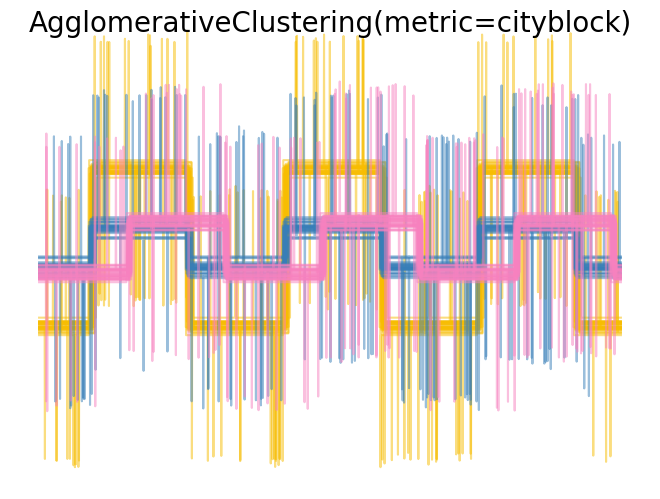

In [20]:
# Authors: The scikit-learn developers
# SPDX-License-Identifier: BSD-3-Clause

import matplotlib.patheffects as PathEffects
import matplotlib.pyplot as plt
import numpy as np

from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import pairwise_distances

np.random.seed(0)

# Generate waveform data
n_features = 2000
t = np.pi * np.linspace(0, 1, n_features)


def sqr(x):
    return np.sign(np.cos(x))


X = list()
y = list()
for i, (phi, a) in enumerate([(0.5, 0.15), (0.5, 0.6), (0.3, 0.2)]):
    for _ in range(30):
        phase_noise = 0.01 * np.random.normal()
        amplitude_noise = 0.04 * np.random.normal()
        additional_noise = 1 - 2 * np.random.rand(n_features)
        # Make the noise sparse
        additional_noise[np.abs(additional_noise) < 0.997] = 0

        X.append(
            12
            * (
                (a + amplitude_noise) * (sqr(6 * (t + phi + phase_noise)))
                + additional_noise
            )
        )
        y.append(i)

X = np.array(X)
y = np.array(y)

n_clusters = 3

labels = ("Waveform 1", "Waveform 2", "Waveform 3")

colors = ["#f7bd01", "#377eb8", "#f781bf"]

# Plot the ground-truth labelling
plt.figure()
plt.axes([0, 0, 1, 1])
for l, color, n in zip(range(n_clusters), colors, labels):
    lines = plt.plot(X[y == l].T, c=color, alpha=0.5)
    lines[0].set_label(n)

plt.legend(loc="best")

plt.axis("tight")
plt.axis("off")
plt.suptitle("Ground truth", size=20, y=1)


# Plot the distances
for index, metric in enumerate(["cosine", "euclidean", "cityblock"]):
    avg_dist = np.zeros((n_clusters, n_clusters))
    plt.figure(figsize=(5, 4.5))
    for i in range(n_clusters):
        for j in range(n_clusters):
            avg_dist[i, j] = pairwise_distances(
                X[y == i], X[y == j], metric=metric
            ).mean()
    avg_dist /= avg_dist.max()
    for i in range(n_clusters):
        for j in range(n_clusters):
            t = plt.text(
                i,
                j,
                "%5.3f" % avg_dist[i, j],
                verticalalignment="center",
                horizontalalignment="center",
            )
            t.set_path_effects(
                [PathEffects.withStroke(linewidth=5, foreground="w", alpha=0.5)]
            )

    plt.imshow(avg_dist, interpolation="nearest", cmap="cividis", vmin=0)
    plt.xticks(range(n_clusters), labels, rotation=45)
    plt.yticks(range(n_clusters), labels)
    plt.colorbar()
    plt.suptitle("Interclass %s distances" % metric, size=18, y=1)
    plt.tight_layout()


# Plot clustering results
for index, metric in enumerate(["cosine", "euclidean", "cityblock"]):
    model = AgglomerativeClustering(
        n_clusters=n_clusters, linkage="average", metric=metric
    )
    model.fit(X)
    plt.figure()
    plt.axes([0, 0, 1, 1])
    for l, color in zip(np.arange(model.n_clusters), colors):
        plt.plot(X[model.labels_ == l].T, c=color, alpha=0.5)
    plt.axis("tight")
    plt.axis("off")
    plt.suptitle("AgglomerativeClustering(metric=%s)" % metric, size=20, y=1)


plt.show()

LINK https://scikit-learn.org/stable/auto_examples/cluster/plot_linkage_comparison.html#sphx-glr-auto-examples-cluster-plot-linkage-comparison-py

In [ ]:
# Aporte de eduardo

aglo = AgglomerativeClustering(n_clusters=2, linkage="single", metric="minkowski") #revisar otros tipos de aglomeracion
aglo.fit(x2)

myColors = {0: 'red', 1: 'blue', 2: 'green', 3: 'yellow'}
plt.scatter(x2[:,0], x2[:,1], c = pd.Series(aglo.labels_).apply(lambda x: myColors[x]), alpha = 0.7)
plt.title("dataset : agglomerative")
plt.show()

### Agrupación jerarquica mediante un solo enlace

In [28]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

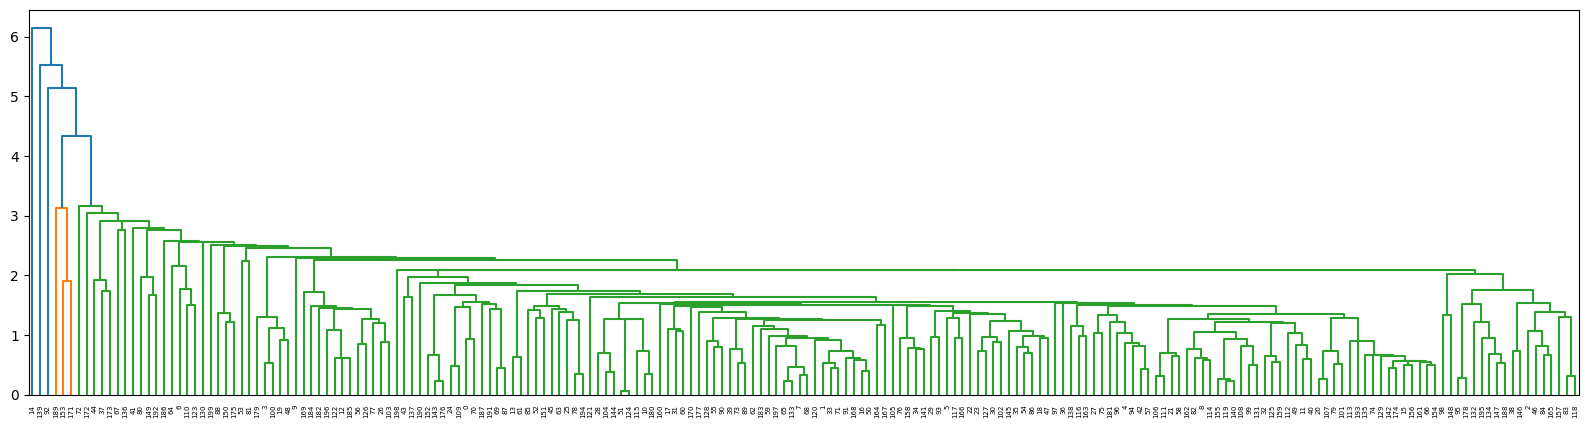

In [29]:
myLinkage = linkage(X1, method='single')
plt.figure(figsize=(20, 5))
dendrogram(myLinkage)
plt.show()

### Definir la altura de corte del dendrograma


https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.fcluster.html

In [25]:
labels = fcluster(myLinkage, 10, criterion='distance')
pd.Series(labels).value_counts()

,count
1,200


In [30]:
labels = fcluster(myLinkage, 1, criterion='distance')
pd.Series(labels).value_counts()

,count
56,14
87,12
82,6
68,5
67,4
...,...
38,1
10,1
25,1
102,1


In [24]:
labels = fcluster(myLinkage, 5, criterion='distance')
pd.Series(labels).value_counts()

,count
1,197
4,1
2,1
3,1


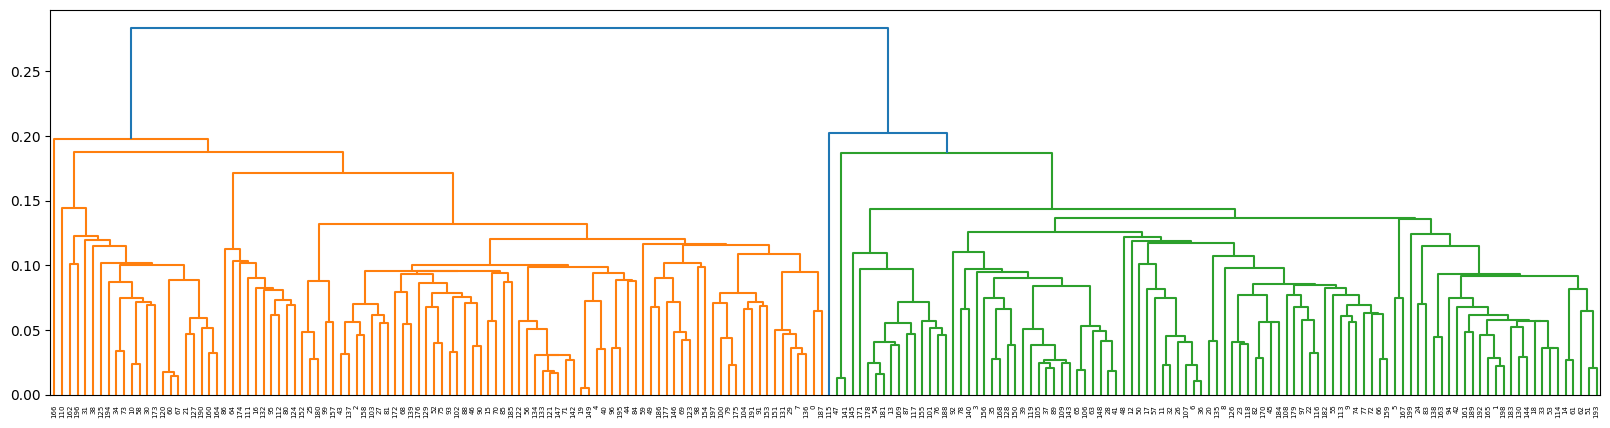

In [26]:
myLinkage = linkage(X2, method='single')
plt.figure(figsize=(20, 5))
dendrogram(myLinkage)
plt.show()

In [27]:
labels = fcluster(myLinkage, 0.23, criterion='distance')
pd.Series(labels).value_counts()

,count
1,100
2,100


# Llegamos a la página 43

NO OLVIDAR: Próxima clase el **viernes 19 de julio**